In [ ]:
import random as rd
import scipy.stats as stat
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter


# Exercises <a name="Exercises"></a>

## Exercise 1: Recursion

> (i) [10 points] The famous Fibonacci numbers are defined recursively as: $F_0 = 0$, $F_1=1$ and $F_n = F_{n-1} + F_{n-2}$.
  Write a recursive function that returns the $n$th Fibonacci number.  

> (ii) [10 points] Modify your Fibonacci function such that it prints the full sequence starting with 1 ending going up to F(n).  

Clarification: for part (i) your function should just give us the last number.  In part (ii) your function should print n numbers.



In [ ]:
def fibonacci(n):
    if n <= 0:
        return []
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)
        # fib_list.append(fib_list[-1] + fib_list[-2])
        # return fib_list

print(fibonacci(15))

377


In [ ]:
def fibonacci(n):
    if n <= 0:
        return []
    elif n == 1:
        return [0]
    elif n == 2:
        return [0, 1]
    else:
        fib_list = fibonacci(n-1)
        fib_list.append(fib_list[-1] + fib_list[-2])
        return fib_list

print(fibonacci(15))

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]


## Exercise 2: Distributions

**What's the distribution?**

We have some `sample_data` and we want to find a distribution that best fits our data.

a) [10 points] Plot a few histograms of the `sample_data`, with different number of bins (10, 20, ...).

b) [10 points] Compute the mean and the standard deviation of the data.

c) [20 points] Draw 200 samples from each of the following discrete distributions: [Binomial](https://en.wikipedia.org/wiki/Binomial_distribution) and [Poisson](https://en.wikipedia.org/wiki/Poisson_distribution). Find out which parameters you need in order to get something that looks like `data_shape` and briefly describe the parameters.

d) [10 points] Plot the histograms of your data in part c (using 15 bins) together with the probability mass function (`data_shape`) of the true data in one plot.

In [1]:
# some sample data!
sample_data = [
        4,  2,  3,  4,  5,  3,  7,  2,  3,  3,  2, 10,  4, 10,  6,  3,  5,
        8,  6,  3,  4,  4,  7,  7,  8,  5,  5,  9,  5,  2,  4,  5,  4,  1,
        6,  6, 10,  6,  6,  4,  7,  6,  3,  9,  2,  8, 10,  3,  7,  6,  6,
        3,  7,  2,  3,  4,  8,  2,  8,  5,  4,  2,  3,  6,  5,  2,  4,  2,
        3,  6,  7,  2,  7,  3,  3,  3,  6,  6,  6,  6,  2,  4,  3,  4,  5,
        4,  2,  7,  7,  5,  6,  4,  5,  2,  5,  4,  6,  6,  5,  4,  4,  4,
        4,  8,  8,  3,  3,  6,  5,  7,  5,  2,  3,  4,  7,  3,  5,  4,  4,
        4,  6,  3,  6,  3,  5,  7,  7,  3,  3,  3,  3,  6,  2,  5,  1,  5,
        9,  8,  4,  7,  3,  4,  2,  5,  7,  5,  8,  1,  4,  4,  4,  5,  7,
        9,  5,  5,  7,  5,  8,  6,  5,  8,  5,  8,  7,  6,  3,  5,  3,  7,
        3,  2,  5,  4,  3,  9,  4,  4,  5,  5,  9,  6,  4,  7,  4,  6,  8,
        4,  3,  7,  5,  5, 12,  6,  4,  4,  7,  7,  5,  4]

# the shape of the above data
data_shape = [0.00673795,0.03368973,0.08422434,0.1403739,0.17546737,
              0.17546737,0.14622281,0.10444486,0.06527804,0.03626558,
              0.01813279,0.00824218,0.00343424,0.00132086,0.00047174]

a) Plot an histogram of the `data_sample`, experiment with changing the number of bins (10, 20, ...).

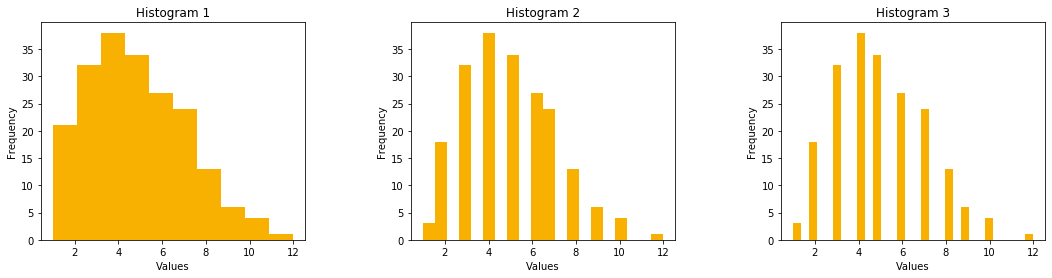

In [ ]:
# plot the histograms
# this is one way you can make a plot with 3 panels
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(18, 4))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# create the first histogram
ax1.hist(sample_data, bins=10, color='#f8b100')
ax1.set_title("Histogram 1")
ax1.set_xlabel("Values")
ax1.set_ylabel("Frequency")

# create the second histogram
ax2.hist(sample_data, bins=20, color='#f8b100')
ax2.set_title("Histogram 2")
ax2.set_xlabel("Values")
ax2.set_ylabel("Frequency")

# create the second histogram
ax3.hist(sample_data, bins=30, color='#f8b100')
ax3.set_title("Histogram 3")
ax3.set_xlabel("Values")
ax3.set_ylabel("Frequency")
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
# make sure each subplot has a title and label the axis!



b) [10 points] Compute the mean and the standard deviation of the data.

In [ ]:
import numpy as np
print('mean:', np.mean(sample_data))
print('std:', np.std(sample_data))

mean: 4.985
std: 2.074795170613234


c) [20 points] Draw 200 samples from each of the following discrete distributions: Binomial and Poisson. Find out which parameters you need in order to get something that looks like data_shape and briefly describe the parameters.

In [ ]:
N = 200 # number of samples

# Binomial distribution
n, p = 10, 0.5
binomial_samples = np.random.binomial(n, p, 200)

# Poisson distribution
lam = 5
poisson_samples = np.random.poisson(lam, 200)



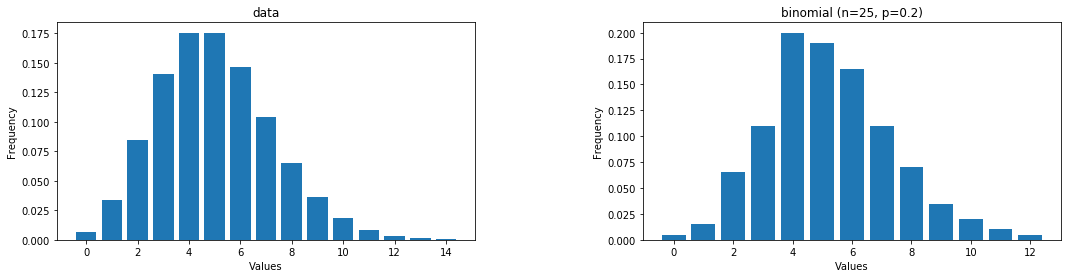

In [ ]:
# Binomial distribution
n, p = 25, 0.2
binomial_samples = np.random.binomial(n, p, 200)
binomial_hist = Counter(binomial_samples).values()

binomial_hist = [x/sum(Counter(binomial_samples).values()) for x in Counter(binomial_samples).values()]
binomial_keys = Counter(binomial_samples).keys()


# plot the histograms
# this is one way you can make a plot with 3 panels
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(18, 4))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# create the first histogram
ax1.bar(range(len(data_shape)), data_shape)
ax1.set_title("data")
ax1.set_xlabel("Values")
ax1.set_ylabel("Frequency")


# create the second histogram
ax2.bar(binomial_keys, binomial_hist)
ax2.set_title("binomial (n=%s, p=%s)" %(n,p))
ax2.set_xlabel("Values")
ax2.set_ylabel("Frequency")


# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
# make sure each subplot has a title and label the axis!



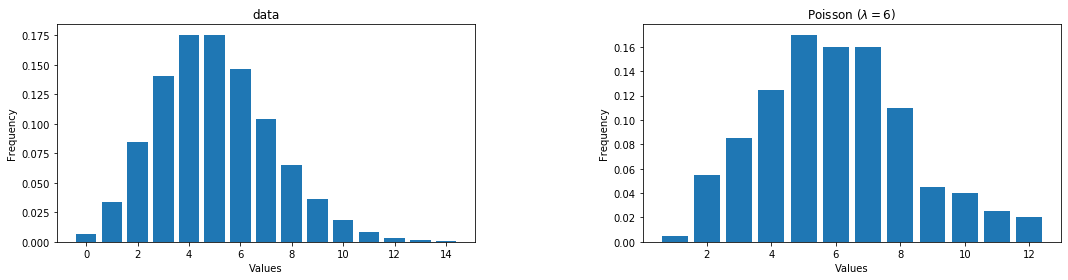

In [ ]:
# Poisson distribution
lam = 6
poisson_samples = np.random.poisson(lam, 200)

poisson_hist = [x/sum(Counter(poisson_samples).values()) for x in Counter(poisson_samples).values()]
poisson_keys = Counter(poisson_samples).keys()


# plot the histograms
# this is one way you can make a plot with 3 panels
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(18, 4))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# create the first histogram
ax1.bar(range(len(data_shape)), data_shape)
ax1.set_title("data")
ax1.set_xlabel("Values")
ax1.set_ylabel("Frequency")


# create the second histogram
ax2.bar(poisson_keys, poisson_hist)
ax2.set_title("Poisson ($\lambda = %s$)" %lam)
ax2.set_xlabel("Values")
ax2.set_ylabel("Frequency")


# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
# make sure each subplot has a title and label the axis!



d) [10 points] Plot the histograms of your data in part c (using 15 bins) together with the probability mass function (`data_shape`) of the true data in one plot.

ValueError: shape mismatch: objects cannot be broadcast to a single shape

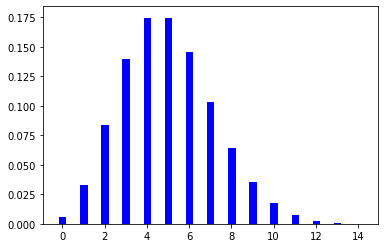

In [ ]:
# data1 = [1, 2, 3, 4, 5]
# data2 = [5, 4, 3, 2, 1]

# range(len(data_shape)), data_shape)

# Create a bar plot
barWidth = 0.4
r1 = np.arange(len(data_shape))
r2 = [x + barWidth for x in r1]
plt.bar(r1, data_shape, color='blue', width=barWidth, edgecolor='white', label='Data Set 1')
plt.bar(r2, binomial_hist, color='red', width=barWidth, edgecolor='white', label='Data Set 2')

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Values')
plt.title('Bar Plot with Multiple Data Sets')



## Exercise 3: Rock Paper Scissors


(a)  [10 points] Program the game 'rock-scissors-paper' and play some rounds against the computer.

(b)  [10 points] Let both players be computers and let them play a million times. Count how often computer player 1 wins, loses or draws. Depict the result as a barplot.

(c)  [10 points] Computer player 1 really wants to win. He decides to try playing 'scissors' 20% more often compared to the other options. Let them play a million rounds with player1's new strategy.
What happens?



In [ ]:
import random

# list of possible options
options = ["rock", "paper", "scissors"]

# function to play the game
def play_game():
    # get player choice
    # player = input("Choose rock, paper, or scissors: ").lower()
    player = random.sample(options,1)[0]
    # check if valid choice
    if player not in options:
        print("Invalid choice, please choose rock, paper, or scissors.")
        return play_game()

    print("Player chose: ", player)

    # get computer choice
    computer = random.choice(options)
    print("Computer chose: ", computer)
    # determine winner
    if player == computer:
        print("It's a tie!")
    elif player == "rock" and computer == "scissors":
        print("You win!")
    elif player == "paper" and computer == "rock":
        print("You win!")
    elif player == "scissors" and computer == "paper":
        print("You win!")
    else:
        print("You lose!")

# start the game
play_game()



Player chose:  rock
Computer chose:  paper
You lose!


(b)   Let both players be computers and let them play a million times. Count how often computer player 1 wins, loses or draws. Depict the result as a barplot.


In [ ]:
import random

# list of possible options
options = ["rock", "paper", "scissors"]

# function to play the game
def play_game():
    # get player choice
    # player = input("Choose rock, paper, or scissors: ").lower()
    player = random.sample(options,1)[0]
    # check if valid choice
    if player not in options:
        print("Invalid choice, please choose rock, paper, or scissors.")
        return play_game()

    # print("Player chose: ", player)

    # get computer choice
    computer = random.choice(options)
    # print("Computer chose: ", computer)
    # determine winner
    if player == computer:
        return 0
    elif player == "rock" and computer == "scissors":
        return 1
    elif player == "paper" and computer == "rock":
        return 1
    elif player == "scissors" and computer == "paper":
        return 1
    else:
        return -1

# start the game
l_result = []
for i in range(1000000):
  l_result.append(play_game())



dict_values([333311, 332643, 334046])


Text(0, 0.5, 'count')

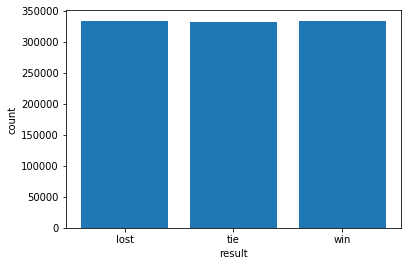

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# create a list of 3 items
data = Counter(l_result).values()
print(data)

# create a bar plot
plt.bar(["lost", "tie", "win"], data)

# add labels to the axes
plt.xlabel("result")
plt.ylabel("count")

(c)   Computer player 1 really wants to win. He decides to try playing `scissors` 20% more often compared to the other options. Play another million rounds with the normal strategy vs player1's strategy.
What happens?



dict_values([333813, 333227, 332960])


Text(0, 0.5, 'count')

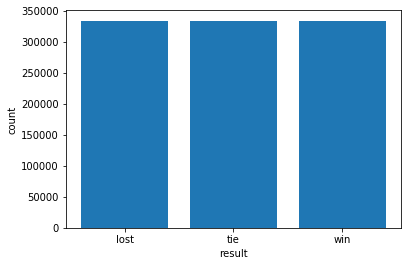

In [ ]:
import random

# list of possible options
options = ["rock", "paper", "scissors"]

# function to play the game
def play_game():
    # get player choice
    # player = input("Choose rock, paper, or scissors: ").lower()
    # player = random.sample(options,1)[0]
    weights = [1, 1, 1.2]
    player = random.choices(options,weights)[0]

    # check if valid choice
    if player not in options:
        print("Invalid choice, please choose rock, paper, or scissors.")
        return play_game()

    # print("Player chose: ", player)

    # get computer choice
    computer = random.choice(options)
    # print("Computer chose: ", computer)
    # determine winner
    if player == computer:
        return 0
    elif player == "rock" and computer == "scissors":
        return 1
    elif player == "paper" and computer == "rock":
        return 1
    elif player == "scissors" and computer == "paper":
        return 1
    else:
        return -1

# start the game
l_result = []
for i in range(1000000):
  l_result.append(play_game())

import matplotlib.pyplot as plt
from collections import Counter

# create a list of 3 items
data = Counter(l_result).values()
print(data)

# create a bar plot
plt.bar(["lost", "tie", "win"], data)

# add labels to the axes
plt.xlabel("result")
plt.ylabel("count")

### HINTS

hint1: you can implement the computer's strategy with the parameter `weights` in the `rd.choices()` function.

hint2: but be careful, because `rd.choices()` returns a list!



## BONUS EXERCISE
**Sample from a continuous distribution**

During an experiment, we measure the energy spectrum of a process described by an expontial function of the form $f(x) = \lambda.exp^{-x.\lambda}$.

> $\lambda$ takes the value $\lambda = 0.8 \frac{1}{keV}$.
>
> $x$ is the measured energy and is therefore positive.

(i) [5 points] Draw 1000 samples from the appropriate distribution and

(ii) [10 points] plot the corresponding histogram together with the function $f(x)$ in the range $0$ to $10 keV$.

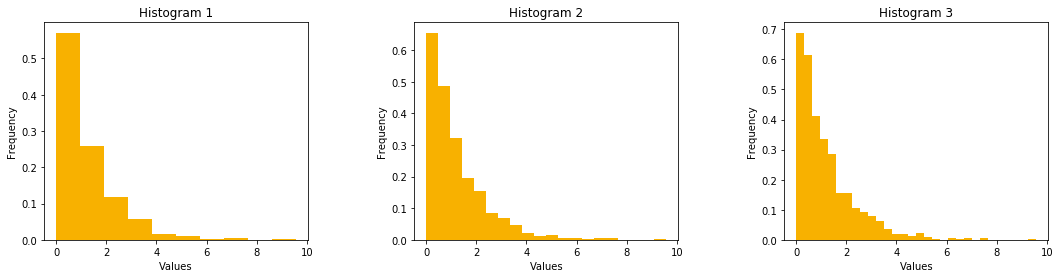

In [ ]:
# Parameters and sampling

lam = 0.8
# define the analytical function
def exp_decay(x,lam=1):
  return lam*np.exp(-lam*x)

  # write your function

samples = np.random.exponential(scale=1/lam, size=1000)

# plot the histograms
# this is one way you can make a plot with 3 panels
fig, [ax1, ax2, ax3] = plt.subplots(1, 3, figsize=(18, 4))

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# create the first histogram
ax1.hist(samples, bins=10, color='#f8b100',density=True)
ax1.set_title("Histogram 1")
ax1.set_xlabel("Values")
ax1.set_ylabel("Frequency")

# create the second histogram
ax2.hist(samples, bins=20, color='#f8b100',density=True)
ax2.set_title("Histogram 2")
ax2.set_xlabel("Values")
ax2.set_ylabel("Frequency")

# create the second histogram
ax3.hist(samples, bins=30, color='#f8b100',density=True)
ax3.set_title("Histogram 3")
ax3.set_xlabel("Values")
ax3.set_ylabel("Frequency")
# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4)
# make sure each subplot has a title and label the axis!



x = np.arange(0.1,10,1)
true_function = exp_decay(x,lam)



# plot all together in the 0-10keV range


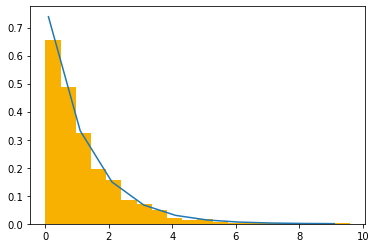

In [ ]:


plt.hist(samples, bins=20, color='#f8b100',density=True)
plt.plot(x,true_function)